In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy.spatial
import pandas as pd
import sklearn.decomposition
import matplotlib.pyplot as plt
# import keras
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances,mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from utils.readProfiles import readMergedProfiles
from utils.pred_models import *
from utils.saveAsNewSheetToExistingFile import saveAsNewSheetToExistingFile
from multiprocessing import Pool

sns.set_style("whitegrid")
# from utils import networksEvol, tsne, readProfiles
import umap

#### Paths

In [2]:
procProf_dir='/home/ubuntu/datasetsbucket/Rosetta-GE-CP/'
# procProf_dir='/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/'
metadata_dir='/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/'
results_dir='./results/'

In [3]:
filename=results_dir+'/SingleGenePred/scores_hyperParam.xlsx'
saved_scores=pd.read_excel(filename, sheet_name=None)
saved_scores.keys()

dict_keys(['MLP-LUAD-nvs-filt-9-ht', 'Lasso-LUAD-nvs-filt-9-ht', 'MLP-TAORF-nvs--5-ht', 'Lasso-TAORF-nvs--5-ht', 'MLP-LINCS-nvs-filt-25-ht', 'Lasso-LINCS-nvs-filt-25-ht', 'MLP-CDRP-bio-nvs-filt-6-ht', 'Lasso-CDRP-bio-nvs-filt-6-ht'])

## Read single gene prediction results

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

0.025694778572532016


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.025694778572532016


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.025694778572532016


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.025694778572532016


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.025694778572532016


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.025694778572532016


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.025694778572532016


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.025694778572532016


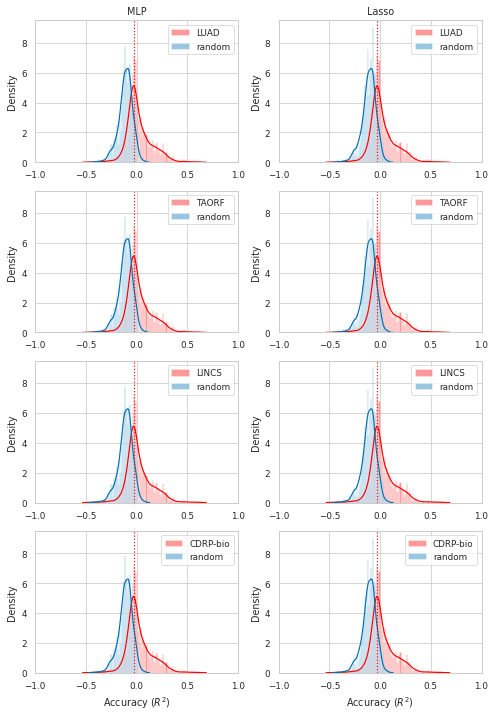

In [51]:
################################################
# dataset options: 'CDRP' , 'LUAD', 'TAORF', 'LINCS', 'CDRP-bio'
datasets=['LUAD', 'TAORF', 'LINCS', 'CDRP-bio'];
# datasets=['LUAD', 'TAORF', 'LINCS', 'CDRP-bio','CDRP'];

DT_kfold={'LUAD':9, 'TAORF':5, 'LINCS':25, 'CDRP-bio':6,'CDRP':40}

################################################
# CP Profile Type options: 'augmented' , 'normalized', 'normalized_variable_selected'
profileType='normalized_variable_selected'
profTypeAbbrev=''.join([s[0] for s in profileType.split('_')])

################################################
# filtering to compounds which have high replicates for both GE and CP datasets
highRepOverlapEnabled=1


################################################
pertColName='PERT'
profileLevel='treatment'; #'replicate'  or  'treatment'
if highRepOverlapEnabled:
    f='filt'
else:
    f=''
    
models=["MLP","Lasso"]

DataPredResults=pd.DataFrame(columns=["Dataset","Model"])

fig, axes = plt.subplots(len(datasets),len(models),figsize=(4*len(models),3*len(datasets)))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
    for m in range(len(models)):
                              
            
        if datasets[d]=='TAORF' or datasets[d]=='CDRP':     
            f=''
        else:
            f='filt'            

        k_fold=DT_kfold[datasets[d]] 
        sheetName=models[m]+'-'+datasets[d]+'-'+profTypeAbbrev+'-'+f+'-'+str(k_fold)+'-ht'

        res_sheet=saved_scores[sheetName]

        d_to_pl=res_sheet.groupby(['lmGens','d']).median().reset_index()   
        d_to_pl_2=d_to_pl.copy()
        
#         d_to_pl_2=res_sheet.copy()
        
        d_to_pl_2['Dataset']=datasets[d]
        d_to_pl_2['Model']=models[m]
        
        
        
        # axes=sns.displot(data=d_to_pl, x="pred score", hue="d")
        #     sns.distplot(saved_scores['Lasso-'+datasets[d]+filter_status[d]].pred_score.values,kde=True,hist=True,bins=100,label=datasets[d],ax=axes,norm_hist=True);
        pred_scoress=d_to_pl[d_to_pl["d"]=="n-folds"]["pred score"].values
#         pred_scoress=res_sheet[res_sheet['d']=='n-folds']["pred score"].values
        rand_scoress=d_to_pl[d_to_pl["d"]=="random"]["pred score"].values
#         rand_scoress=res_sheet[res_sheet['d']=='random']["pred score"].values
        sns.distplot(pred_scoress,kde=True,hist=True,bins=100,label=datasets[d],ax=axes[d,m],norm_hist=True,color='r')
        sns.distplot(rand_scoress,kde=True,hist=True,bins=100,label='random',ax=axes[d,m],norm_hist=True)
        rand99th=np.percentile(rand_scoress,99)
        print(rand99th)
        
        d_to_pl_2['rand99th']=rand99th
        DataPredResults=DataPredResults.append(d_to_pl_2)
        
        
        axes[d,0].set_xlim(-1,1)
        axes[d,1].set_xlim(-1,1)
#         axes[d,1].set_xlim(-.5,.5)
#         axes[d,m].set_xlim(-0.5,0.6)
#         axes[d,m].set_ylim(0,15)
        axes[d,m].axvline(x=np.percentile(rand_scoress,90),linestyle=':',color='r');
        axes[len(datasets)-1,m].set_xlabel("Accuracy ($R^2$)");
        axes[d,m].legend();
        axes[0,m].set_title(models[m]);

DataPredResults.loc[DataPredResults['d']=='random','Model']=DataPredResults[DataPredResults['d']=='random']['Model']+'-'+DataPredResults[DataPredResults['d']=='random']['d']

In [48]:
# d_to_pl_2

## Single gene prediction barplot for each dataset and each model

<IPython.core.display.Javascript object>


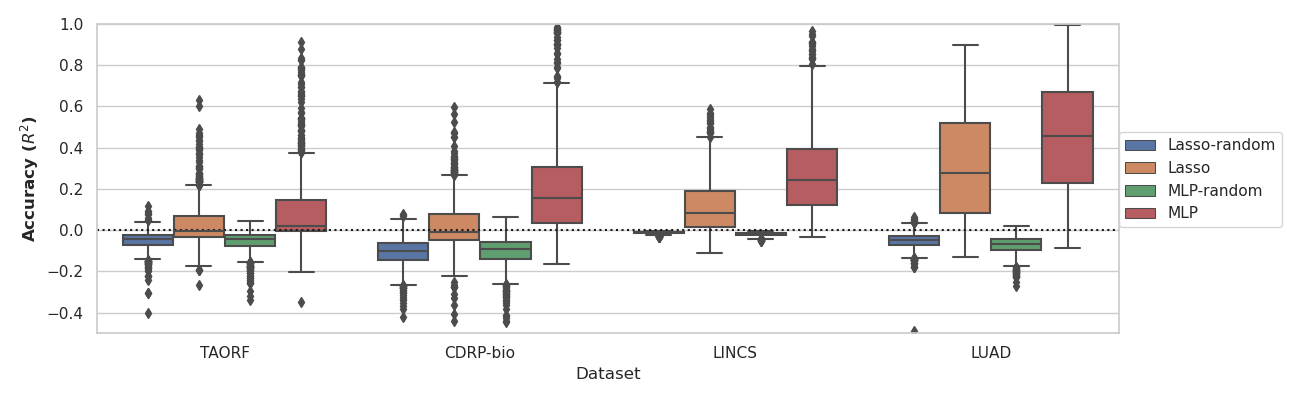

In [5]:

# DataPredResults
import matplotlib.style as style
style.use('seaborn-colorblind')
sns.set_context("paper",font_scale = 2, rc={"font.size":20,"axes.titlesize":8,"axes.labelsize":10})

# DataPredResults.loc[DataPredResults['d']=='random','Model']=DataPredResults[DataPredResults['d']=='random']['Model']+'-'+DataPredResults[DataPredResults['d']=='random']['d']
plt.figure(figsize=(13,4))

# plt.rcParams["axes.labelsize"] = 40
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Dataset", y="pred score", hue="Model",data=DataPredResults,\
                order=['TAORF','CDRP-bio','LINCS','LUAD'], hue_order=['Lasso-random','Lasso','MLP-random','MLP'])
ax.set_ylim(-.5,1);
ax.set_ylabel("Accuracy ($R^2$)", fontweight='bold'); #fontsize=14,
ax.axhline(y=0,linestyle=':',color='k');
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, .65), loc='upper left', borderaxespad=0)
plt.tight_layout()
# plt.savefig('pred_gen_all_models2.eps')

## Single gene prediction table

In [6]:
DataPredResults2=DataPredResults.loc[DataPredResults['d']!='random'].reset_index(drop=True)
DataPredResults2[DataPredResults2["pred score"]>DataPredResults2['rand99th']+0.2].groupby(['Dataset','Model']).size()*100/978

Dataset   Model
CDRP-bio  Lasso     7.873211
          MLP      38.445808
LINCS     Lasso    23.210634
          MLP      60.429448
LUAD      Lasso    56.952965
          MLP      77.505112
TAORF     Lasso     4.601227
          MLP      17.791411
dtype: float64

In [5]:
DataPredResults2=DataPredResults.loc[DataPredResults['d']!='random'].reset_index(drop=True)
DataPredResults2[DataPredResults2["pred score"]>DataPredResults2['rand99th']+0.2].groupby(['Dataset','Model']).size()

Dataset   Model
CDRP-bio  Lasso     77
          MLP      376
LINCS     Lasso    227
          MLP      591
LUAD      Lasso    557
          MLP      758
TAORF     Lasso     45
          MLP      174
dtype: int64

## Venn diagram of the highly predictable genes across datasets - MLP model

<IPython.core.display.Javascript object>


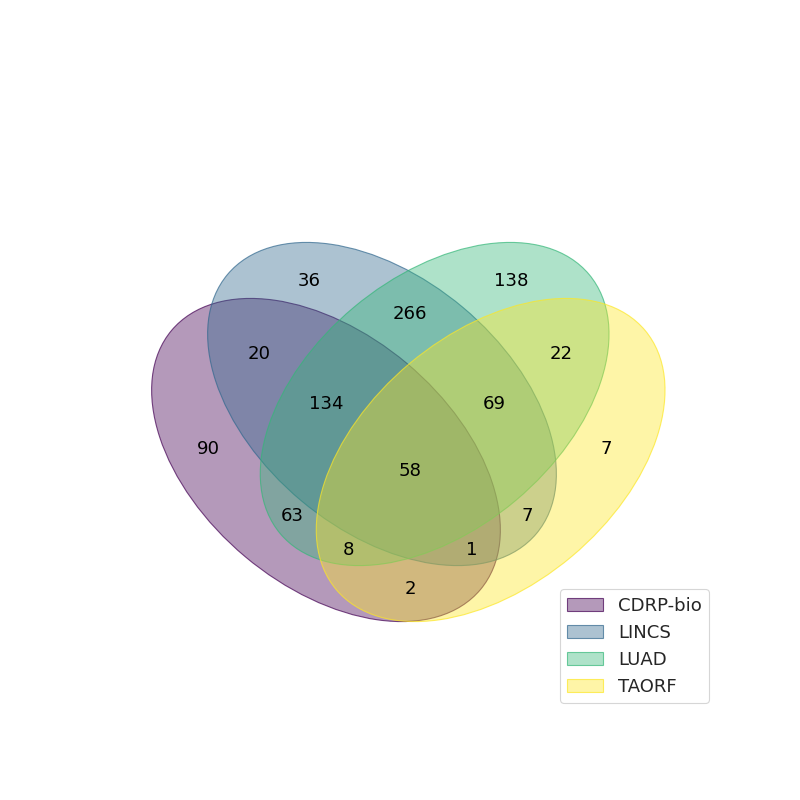

In [6]:
DataPredRes4venn=DataPredResults2[DataPredResults2["pred score"]>DataPredResults2['rand99th']+0.2]
DataPredRes4venn=DataPredRes4venn[DataPredRes4venn['Model']=='MLP'].reset_index(drop=True)
# DataPredRes4venn

from venn import venn
list_4_ven={}
dsets=["CDRP-bio","LINCS","LUAD", "TAORF"]
set_lab=tuple(dsets) 
# plt.figure()
for d in dsets:
    list_4_ven[d]=set(DataPredRes4venn[DataPredRes4venn["Dataset"]==d].lmGens)

# venn(list_4_ven,legend_loc='upper center')
venn(list_4_ven,legend_loc='lower right');
# plt.tight_layout()
# plt.savefig('pred_gen_venn.eps')

## Explore gene family of top genes in LUAD (>98% $R^2$) 
- Using hgnc_gene_group_family_dictionary

In [6]:
# top 58 overlap in all datasets
"""
topInAll=DataPredRes4venn.groupby(['lmGens','Dataset']).size().reset_index().groupby(['lmGens']).size().reset_index()
top58=topInAll[topInAll[0]>3].lmGens.tolist()
"""
# top 20 in LUAD
top58=DataPredResults2[DataPredResults2["Dataset"]=="LUAD"].sort_values(by="pred score")[-20:]['lmGens'].tolist()

In [52]:
# top58=DataPredResults2[DataPredResults2["Dataset"]=="LUAD"].sort_values(by="pred score")[-20:]['lmGens'].tolist()
# top58
# DataPredResults2[DataPredResults2["Dataset"]=="LUAD"].sort_values(by="pred score")[-20:]

In [7]:
meta_geneFamily = pd.read_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/hgnc_gene_group_family_dictionary.csv")
# genesU = meta_geneFamily.approved_symbol.unique().tolist()
# meta_geneFamilyU=pd.DataFrame(index=range(len(genesU)),columns=["lmGens","gene_group_name"])

meta_geneFamily_top=meta_geneFamily[meta_geneFamily['approved_symbol'].isin(top58)].reset_index(drop=True)
meta_top=meta_geneFamily_top.groupby(['gene_group_name']).size().sort_values(ascending=False).reset_index()

In [24]:
len(set(top58))

20

In [47]:
# meta_geneFamily[meta_geneFamily['approved_symbol'].isin(top58)].shape
# meta_top
# meta_geneFamily_top

In [17]:
from matplotlib.cm import get_cmap

name = "tab20"
cmap = get_cmap(name,10)  # type: matplotlib.colors.ListedColormap
# colors = 
cmap.colors
# len(labels)

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.76862745, 0.61176471, 0.58039216, 1.        ],
       [0.96862745, 0.71372549, 0.82352941, 1.        ],
       [0.78039216, 0.78039216, 0.78039216, 1.        ],
       [0.85882353, 0.85882353, 0.55294118, 1.        ],
       [0.61960784, 0.85490196, 0.89803922, 1.        ]])

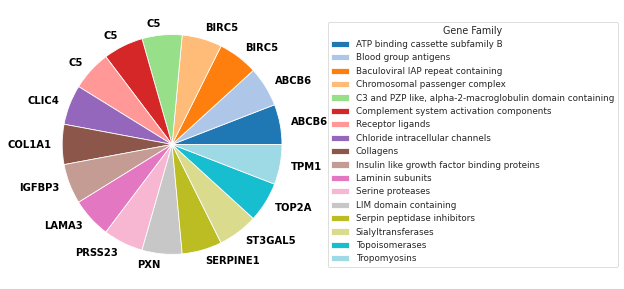

In [22]:
fig, ax = plt.subplots(figsize=(8, 7), subplot_kw=dict(aspect="equal"))

labels = meta_geneFamily_top['approved_symbol'].to_list()
ingredients = meta_geneFamily_top['gene_group_name'].to_list()
data=np.ones(meta_geneFamily_top['gene_group_name'].shape[0],)


wedges, autotexts = ax.pie(data,labels=labels,colors=get_cmap('tab20',len(labels)).colors ,#autopct=lambda pct: func(pct,meta_geneFamily_top),
                                  textprops=dict(color="k"))

ax.legend(wedges, ingredients,
          title="Gene Family",
          loc="center left",
          bbox_to_anchor=(1.05, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

# ax.set_title("LUAD top genes")
plt.tight_layout()
plt.show()

In [23]:
# wedges

## Supp Table of prediction scores for each of the MLP and Lasso models 

In [27]:
unq_lmgenes=DataPredResults2['lmGens'].unique()

d_luad=DataPredResults2[DataPredResults2['Dataset']=='LUAD'].reset_index(drop=True)
d_cdrpbio=DataPredResults2[DataPredResults2['Dataset']=='CDRP-bio'].reset_index(drop=True)
d_lincs=DataPredResults2[DataPredResults2['Dataset']=='LINCS'].reset_index(drop=True)
d_taorf=DataPredResults2[DataPredResults2['Dataset']=='TAORF'].reset_index(drop=True)

# unq_lmgenes

In [28]:
cols=["CDRP-bio-Lasso","CDRP-bio-MLP",\
        "LUAD-Lasso","LUAD-MLP",\
        "LINCS-Lasso","LINCS-MLP",\
        "TAORF-Lasso","TAORF-MLP"]
DataAppendix=pd.DataFrame(index=unq_lmgenes,columns=cols)

for ds in ['LUAD', 'TAORF', 'LINCS', 'CDRP-bio']:
    for m in ['Lasso','MLP']:
        d_luad=DataPredResults2[DataPredResults2['Dataset']==ds].reset_index(drop=True)
        d_luad2=d_luad[(d_luad["Model"]==m)]
        DataAppendix.loc[d_luad2["lmGens"].values,ds+"-"+m]=d_luad2["pred score"].values
DataAppendix[cols]=DataAppendix[cols]*100
DataAppendix[cols]=DataAppendix[cols].astype(float).round(2)

In [33]:
DataAppendix.to_csv(results_dir+'/SingleGenePred/Appendix_D.csv')

In [34]:
# DataAppendix#.to_markdown()

In [226]:
# DataAppendix.loc[unq_lmgenes.tolist()]

In [248]:
DataAppendix.shape
    
# DataAppendix[unq_lmgenes,"LUAD-MLP"]=d_luad[(d_luad["lmGens"].isin(unq_lmgenes))&(d_luad["Model"]=='MLP')]["pred score"]

(1170, 8)

In [249]:
# DataAppendix[(d_luad["lmGens"].isin(unq_lmgenes))]
# DataAppendix
# d_luad=DataPredResults2[DataPredResults2['Dataset']=='LUAD'].reset_index(drop=True)
# DataAppendix[0:60]
range(0,60*20,60)

range(0, 1200, 60)

In [252]:
# d_luad["lmGens"]
# DataAppendix.loc[d_luad["lmGens"].values]
for i in range(0,55*20,55):
    print("\\begin{table}")
    print(DataAppendix[i:i+55].to_latex(index=True))  
    print("\end{table}")

In [40]:
# DataPredResults

## Appendix - Top 50 GE using MLP

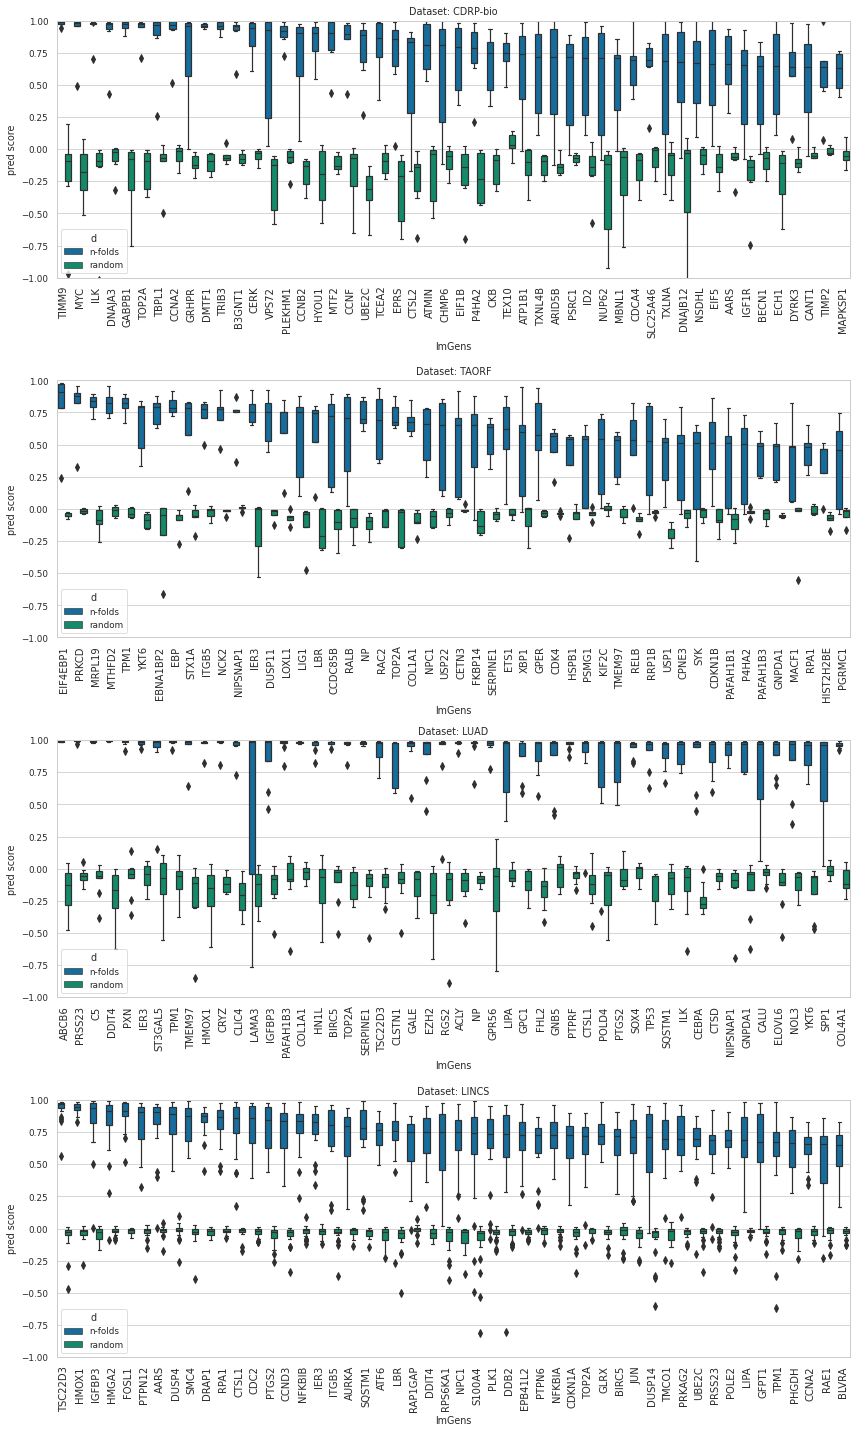

In [52]:
datasets=['CDRP-bio' , 'TAORF', 'LUAD','LINCS']
models=["MLP"]
f='-filt';#'-filt'

fig, axes = plt.subplots(len(datasets),1,figsize=(12,20))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
    for m in range(len(models)):
        dataset_meth_dists=DataPredResults[(DataPredResults['Dataset']==datasets[d]) &\
                                                    (DataPredResults['Model']==models[m])]
        sorted_gene_mean_scores=dataset_meth_dists[dataset_meth_dists['d']=='n-folds'].groupby(['lmGens','d']).median().reset_index().sort_values(by=['pred score'],ascending=False)
        top_lmGenes=sorted_gene_mean_scores['lmGens'].tolist()[0:50]
        dataset_meth_dists_top_50=dataset_meth_dists[dataset_meth_dists['lmGens'].isin(top_lmGenes)]
        
#         f, axes = plt.subplots(figsize=(15,4))
        axes[d].set_title("Dataset: "+datasets[d])
        sns.boxplot(x="lmGens", y="pred score",hue="d", data=dataset_meth_dists_top_50,ax=axes[d],order=top_lmGenes)
        # ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
        axes[d].set_xticklabels(axes[d].get_xticklabels(),rotation=90,fontsize=10);
        axes[d].set_ylim(-1, 1)
        
fig.tight_layout()
# fig.savefig('appendix_B.eps')

## single GE cross datasets prediction results (LUAD and LINCS)

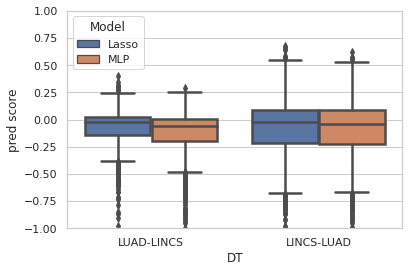

In [65]:
filename=results_dir+'/SingleGenePred/scores_cross_dts.xlsx'
saved_scores=pd.read_excel(filename, sheet_name=None)
saved_scores.keys()

scores_l=saved_scores['Lasso-n-filt-ht']
scores_l['Model']='Lasso'

scores_m=saved_scores['MLP-n-filt-ht']
scores_m['Model']='MLP'

scores=pd.concat([scores_l,scores_m])

ax = sns.boxplot(x="DT", y="pred score", hue="Model",
                 data=scores, linewidth=2.5)
ax.set_ylim(-1,1);

## Read single CP feature prediction results

In [24]:
filename=results_dir+'/SingleCPfeatPred/scores_hyperParam.xlsx'
saved_scores=pd.read_excel(filename, sheet_name=None)
saved_scores.keys()

dict_keys(['Lasso-TAORF-n--7-ht', 'Lasso-TAORF-n--5-ht', 'MLP-TAORF-n--5-ht', 'Lasso-LUAD-n-filt-9-ht', 'MLP-LUAD-n-filt-9-ht', 'Lasso-LINCS-n-filt-25-ht', 'Lasso-CDRP-n--40-ht', 'MLP-LINCS-n-filt-25-ht', 'Lasso-CDRP-bio-n-filt-6-ht', 'MLP-CDRP-bio-n-filt-6-ht'])

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

-0.1960388760359092


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.02807406546700771


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.1285110183629015
0.05268358301618449


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

-0.9683046999579288


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.0030023651933078687


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.185286786655459


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.03125936124371186


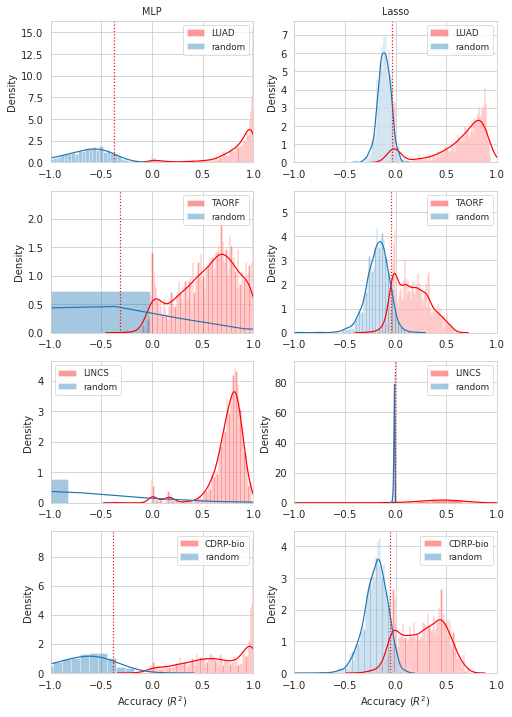

In [25]:
################################################
# dataset options: 'CDRP' , 'LUAD', 'TAORF', 'LINCS', 'CDRP-bio'
datasets=['LUAD', 'TAORF', 'LINCS', 'CDRP-bio'];
# datasets=['LUAD', 'TAORF', 'LINCS', 'CDRP-bio','CDRP'];

DT_kfold={'LUAD':9, 'TAORF':5, 'LINCS':25, 'CDRP-bio':6,'CDRP':40}

################################################
# CP Profile Type options: 'augmented' , 'normalized', 'normalized_variable_selected'
profileType='normalized'
profTypeAbbrev=''.join([s[0] for s in profileType.split('_')])

################################################
# filtering to compounds which have high replicates for both GE and CP datasets
highRepOverlapEnabled=1


################################################
pertColName='PERT'
profileLevel='treatment'; #'replicate'  or  'treatment'
if highRepOverlapEnabled:
    f='filt'
else:
    f=''
    
models=["MLP","Lasso"]

DataPredResults=pd.DataFrame(columns=["Dataset","Model"])

fig, axes = plt.subplots(len(datasets),len(models),figsize=(4*len(models),3*len(datasets)))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
    for m in range(len(models)):
                              
            
        if datasets[d]=='TAORF' or datasets[d]=='CDRP':     
            f=''
        else:
            f='filt'            

        k_fold=DT_kfold[datasets[d]] 
        sheetName=models[m]+'-'+datasets[d]+'-'+profTypeAbbrev+'-'+f+'-'+str(k_fold)+'-ht'

        res_sheet=saved_scores[sheetName]
#         d_to_pl_2=res_sheet.copy()
        
        d_to_pl=res_sheet.groupby(['CP-Features','d']).median().reset_index()   
        d_to_pl_2=d_to_pl.copy()
        
        d_to_pl_2['Dataset']=datasets[d]
        d_to_pl_2['Model']=models[m]
        
        
        
        # axes=sns.displot(data=d_to_pl, x="pred score", hue="d")
        #     sns.distplot(saved_scores['Lasso-'+datasets[d]+filter_status[d]].pred_score.values,kde=True,hist=True,bins=100,label=datasets[d],ax=axes,norm_hist=True);
        pred_scoress=d_to_pl[d_to_pl["d"]=="n-folds"]["pred score"].values
#         pred_scoress=res_sheet[res_sheet['d']=='n-folds']["pred score"].values
        rand_scoress=d_to_pl[d_to_pl["d"]=="random"]["pred score"].values
#         rand_scoress=res_sheet[res_sheet['d']=='random']["pred score"].values
        sns.distplot(pred_scoress,kde=True,hist=True,bins=100,label=datasets[d],ax=axes[d,m],norm_hist=True,color='r')
        sns.distplot(rand_scoress,kde=True,hist=True,bins=100,label='random',ax=axes[d,m],norm_hist=True)
        rand99th=np.percentile(rand_scoress,99)
        print(rand99th)
        
        d_to_pl_2['rand99th']=rand99th
        DataPredResults=DataPredResults.append(d_to_pl_2)
        
        
        axes[d,0].set_xlim(-1,1)
        axes[d,1].set_xlim(-1,1)
#         axes[d,1].set_xlim(-.5,.5)
#         axes[d,m].set_xlim(-0.5,0.6)
#         axes[d,m].set_ylim(0,15)
        axes[d,m].axvline(x=np.percentile(rand_scoress,90),linestyle=':',color='r');
        axes[len(datasets)-1,m].set_xlabel("Accuracy ($R^2$)");
        axes[d,m].legend();
        axes[0,m].set_title(models[m]);

DataPredResults.loc[DataPredResults['d']=='random','Model']=DataPredResults[DataPredResults['d']=='random']['Model']+'-'+DataPredResults[DataPredResults['d']=='random']['d']

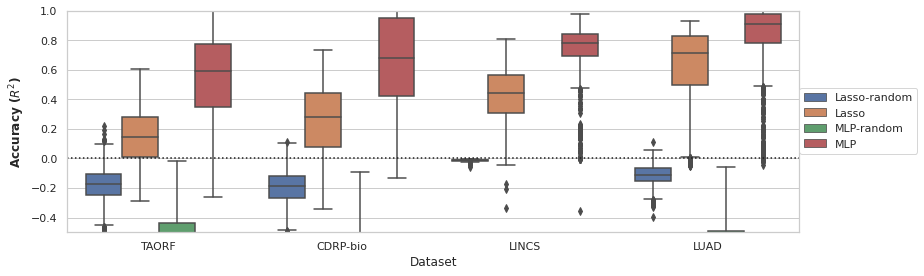

In [9]:
# DataPredResults
import matplotlib.style as style
style.use('seaborn-colorblind')
sns.set_context("paper",font_scale = 2, rc={"font.size":20,"axes.titlesize":8,"axes.labelsize":10})

# DataPredResults.loc[DataPredResults['d']=='random','Model']=DataPredResults[DataPredResults['d']=='random']['Model']+'-'+DataPredResults[DataPredResults['d']=='random']['d']
plt.figure(figsize=(13,4))

# plt.rcParams["axes.labelsize"] = 40
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Dataset", y="pred score", hue="Model",data=DataPredResults,\
                order=['TAORF','CDRP-bio','LINCS','LUAD'], hue_order=['Lasso-random','Lasso','MLP-random','MLP'])
ax.set_ylim(-.5,1);
ax.set_ylabel("Accuracy ($R^2$)", fontweight='bold'); #fontsize=14,
ax.axhline(y=0,linestyle=':',color='k');
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, .65), loc='upper left', borderaxespad=0)
plt.tight_layout()
# plt.savefig('pred_gen_all_models2.eps')

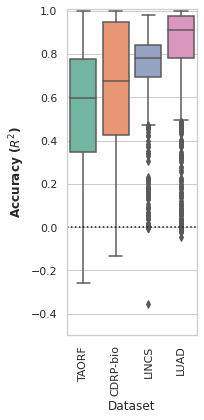

In [10]:
DataPredResults_fPlot=DataPredResults[(DataPredResults['d']!='random')&(DataPredResults['Model']=='MLP')].reset_index(drop=True)
# DataPredResults
import matplotlib.style as style
style.use('seaborn-colorblind')
sns.set_context("paper",font_scale = 2, rc={"font.size":20,"axes.titlesize":8,"axes.labelsize":10})

# DataPredResults.loc[DataPredResults['d']=='random','Model']=DataPredResults[DataPredResults['d']=='random']['Model']+'-'+DataPredResults[DataPredResults['d']=='random']['d']
plt.figure(figsize=(3,6))

# plt.rcParams["axes.labelsize"] = 40
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Dataset", y="pred score",data=DataPredResults_fPlot,\
                order=['TAORF','CDRP-bio','LINCS','LUAD'],palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim(-.5,1.01);
ax.set_ylabel("Accuracy ($R^2$)", fontweight='bold'); #fontsize=14,
ax.axhline(y=0,linestyle=':',color='k');
plt.tight_layout()
# plt.legend(bbox_to_anchor=(1, .65), loc='upper left', borderaxespad=0)
plt.tight_layout()

In [26]:
DataPredResults2=DataPredResults.loc[DataPredResults['d']!='random'].reset_index(drop=True)
DataPredResults2[DataPredResults2["pred score"]>DataPredResults2['rand99th']+0.2].groupby(['Dataset','Model']).size()

Dataset   Model
CDRP-bio  Lasso     894
          MLP      1527
LINCS     Lasso    1469
          MLP      1670
LUAD      Lasso    1337
          MLP      1546
TAORF     Lasso     500
          MLP      1526
dtype: int64

## CP feature cats for fs with median pred score across all datasets >0.9

In [44]:
dfRes1=DataPredResults2[DataPredResults2['Model']=='MLP'].reset_index(drop=True)
dfRes2=dfRes1.groupby(['CP-Features']).median().sort_values(by='pred score',ascending=False)
dfRes3=dfRes2[dfRes2['pred score']>0.9]
topFeatures=dfRes3.index.tolist()
cp_featuress=dfRes2.index.tolist()
# dfRes1=DataPredResults2[DataPredResults2['Model']=='MLP'].reset_index(drop=True)

In [44]:
# Channelss[ch]

In [45]:
# topFeatures
# dfRes2.index.tolist()

In [119]:
# [s for s in topFeatures if (Channelss[ch] in s) and (featureGroups[f] in s)]

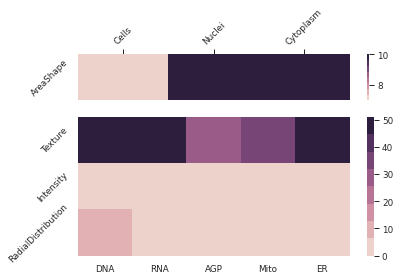

In [54]:
label2=[]
r2=[]
r2_t=[]
Channelss=['DNA','RNA','AGP','Mito','ER']
featureGroups=['Texture','Intensity','RadialDistribution']

Mat=np.zeros((len(featureGroups),len(Channelss)));
scaler = preprocessing.StandardScaler()

for ch in range(len(Channelss)):
    for f in range(len(featureGroups)):
        freq=len([s for s in topFeatures if (Channelss[ch] in s) and (featureGroups[f] in s)])
        freq_t=len([s for s in cp_featuress if (Channelss[ch] in s) and (featureGroups[f] in s)])
        
        Mat[f,ch]=freq
        if freq>0:
            label2.append(Channelss[ch]+'-'+featureGroups[f])
            r2.append(freq)
            r2_t.append(freq_t)
            
fig, axes = plt.subplots(2,1,gridspec_kw = {'height_ratios':[1, 3]});
sns.heatmap(Mat,cmap=sns.cubehelix_palette(8),ax=axes[1])
axes[1].xaxis.set_ticklabels(Channelss); 
axes[1].yaxis.set_ticklabels(featureGroups,rotation=360+45);
plt.tight_layout()

cellAreas=["Cells","Nuclei","Cytoplasm"];
MatArea=np.zeros((1,len(cellAreas)));
for ca in range(len(cellAreas)):
    freq=len([s for s in topFeatures if (cellAreas[ca] in s) and ('AreaShape' in s)])
    freq_t=len([s for s in cp_featuress if (cellAreas[ca] in s) and ('AreaShape' in s)])
    
    MatArea[0,ca]=freq
    if freq>0:
        label2.append(cellAreas[ca]+'-AreaShape')
        r2.append(freq)
        r2_t.append(freq)
#     print(MatArea)
sns.heatmap(MatArea,cmap=sns.cubehelix_palette(8),ax=axes[0])
axes[0].xaxis.tick_top()
axes[0].xaxis.set_ticklabels(cellAreas,rotation=360+45); 
axes[0].yaxis.set_ticklabels(['AreaShape'],rotation=360+45);   
plt.tight_layout()

# colors2=sns.color_palette("husl", len(label2))
colors2=sns.color_palette("colorblind", len(label2))


In [39]:
r2

[46, 5, 8, 45, 2, 28, 4, 5, 35, 3, 51, 7, 10, 10]

In [57]:
# DataPredResults2[(DataPredResults2['Dataset']=='LUAD')&(DataPredResults2['CP-Features']=='Cells_AreaShape_Area')]
ratio_list2=[(r2[i]/r2_t[i])*20 for i in range(len(r2))]

In [121]:
# print(DataPredResults2.groupby(['Dataset','CP-Features']).size().reset_index().to_markdown())

In [122]:
# DataPredResults2

In [ ]:
colorblind

In [155]:
# sns.color_palette("colorblind", len(label2))


In [62]:
label2

['DNA-Texture',
 'DNA-Intensity',
 'DNA-RadialDistribution',
 'RNA-Texture',
 'RNA-Intensity',
 'AGP-Texture',
 'AGP-Intensity',
 'AGP-RadialDistribution',
 'Mito-Texture',
 'Mito-Intensity',
 'ER-Texture',
 'Cells-AreaShape',
 'Nuclei-AreaShape',
 'Cytoplasm-AreaShape']

<IPython.core.display.Javascript object>


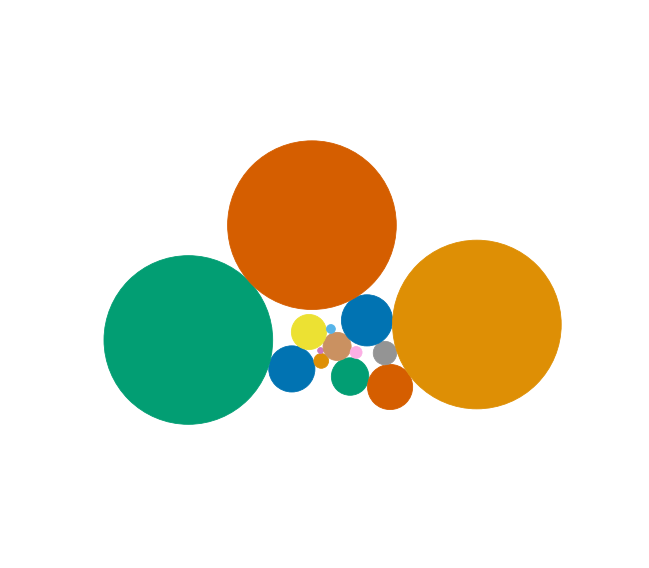

In [60]:
class C():
    def __init__(self,r,label,colors):
        self.N = len(r)
        self.x = np.ones((self.N,3))
        self.x[:,2] = r
        self.labels = label
        self.colors = colors
        maxstep = 2*self.x[:,2].max()
        length = np.ceil(np.sqrt(self.N))
        grid = np.arange(0,length*maxstep,maxstep)
        gx,gy = np.meshgrid(grid,grid)
        self.x[:,0] = gx.flatten()[:self.N]
        self.x[:,1] = gy.flatten()[:self.N]
        self.x[:,:2] = self.x[:,:2] - np.mean(self.x[:,:2], axis=0)

        self.step = self.x[:,2].min()
        self.p = lambda x,y: np.sum((x**2+y**2)**2)
        self.E = self.energy()
        self.iter = 1.

    def minimize(self):
        while self.iter < 1000*self.N:
            for i in range(self.N):
                rand = np.random.randn(2)*self.step/self.iter
                self.x[i,:2] += rand
                e = self.energy()
                if (e < self.E and self.isvalid(i)):
                    self.E = e
                    self.iter = 1.
                else:
                    self.x[i,:2] -= rand
                    self.iter += 1.

    def energy(self):
        return self.p(self.x[:,0], self.x[:,1])

    def distance(self,x1,x2):
        return np.sqrt((x1[0]-x2[0])**2+(x1[1]-x2[1])**2)-x1[2]-x2[2]

    def isvalid(self, i):
        for j in range(self.N):
            if i!=j: 
                if self.distance(self.x[i,:], self.x[j,:]) < 0:
                    return False
        return True

    def plot(self, ax):
        for i in range(self.N):
            circ = plt.Circle(self.x[i,:2],self.x[i,2],color=self.colors[i])
            
#             ax.text(self.x[i,:2],self.x[i,2], 'sgfd', size=24, ha='center', va='center',color='k')
            ax.add_patch(circ)
#             label = ax.annotate(self.labels[i], xy=(self.x[i,:2]), fontsize=10, ha="center",color='k')


c = C(ratio_list2,[],colors2)

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
ax.axis("off")

c.minimize()

c.plot(ax)
ax.relim()
ax.autoscale_view()
plt.show()

<IPython.core.display.Javascript object>


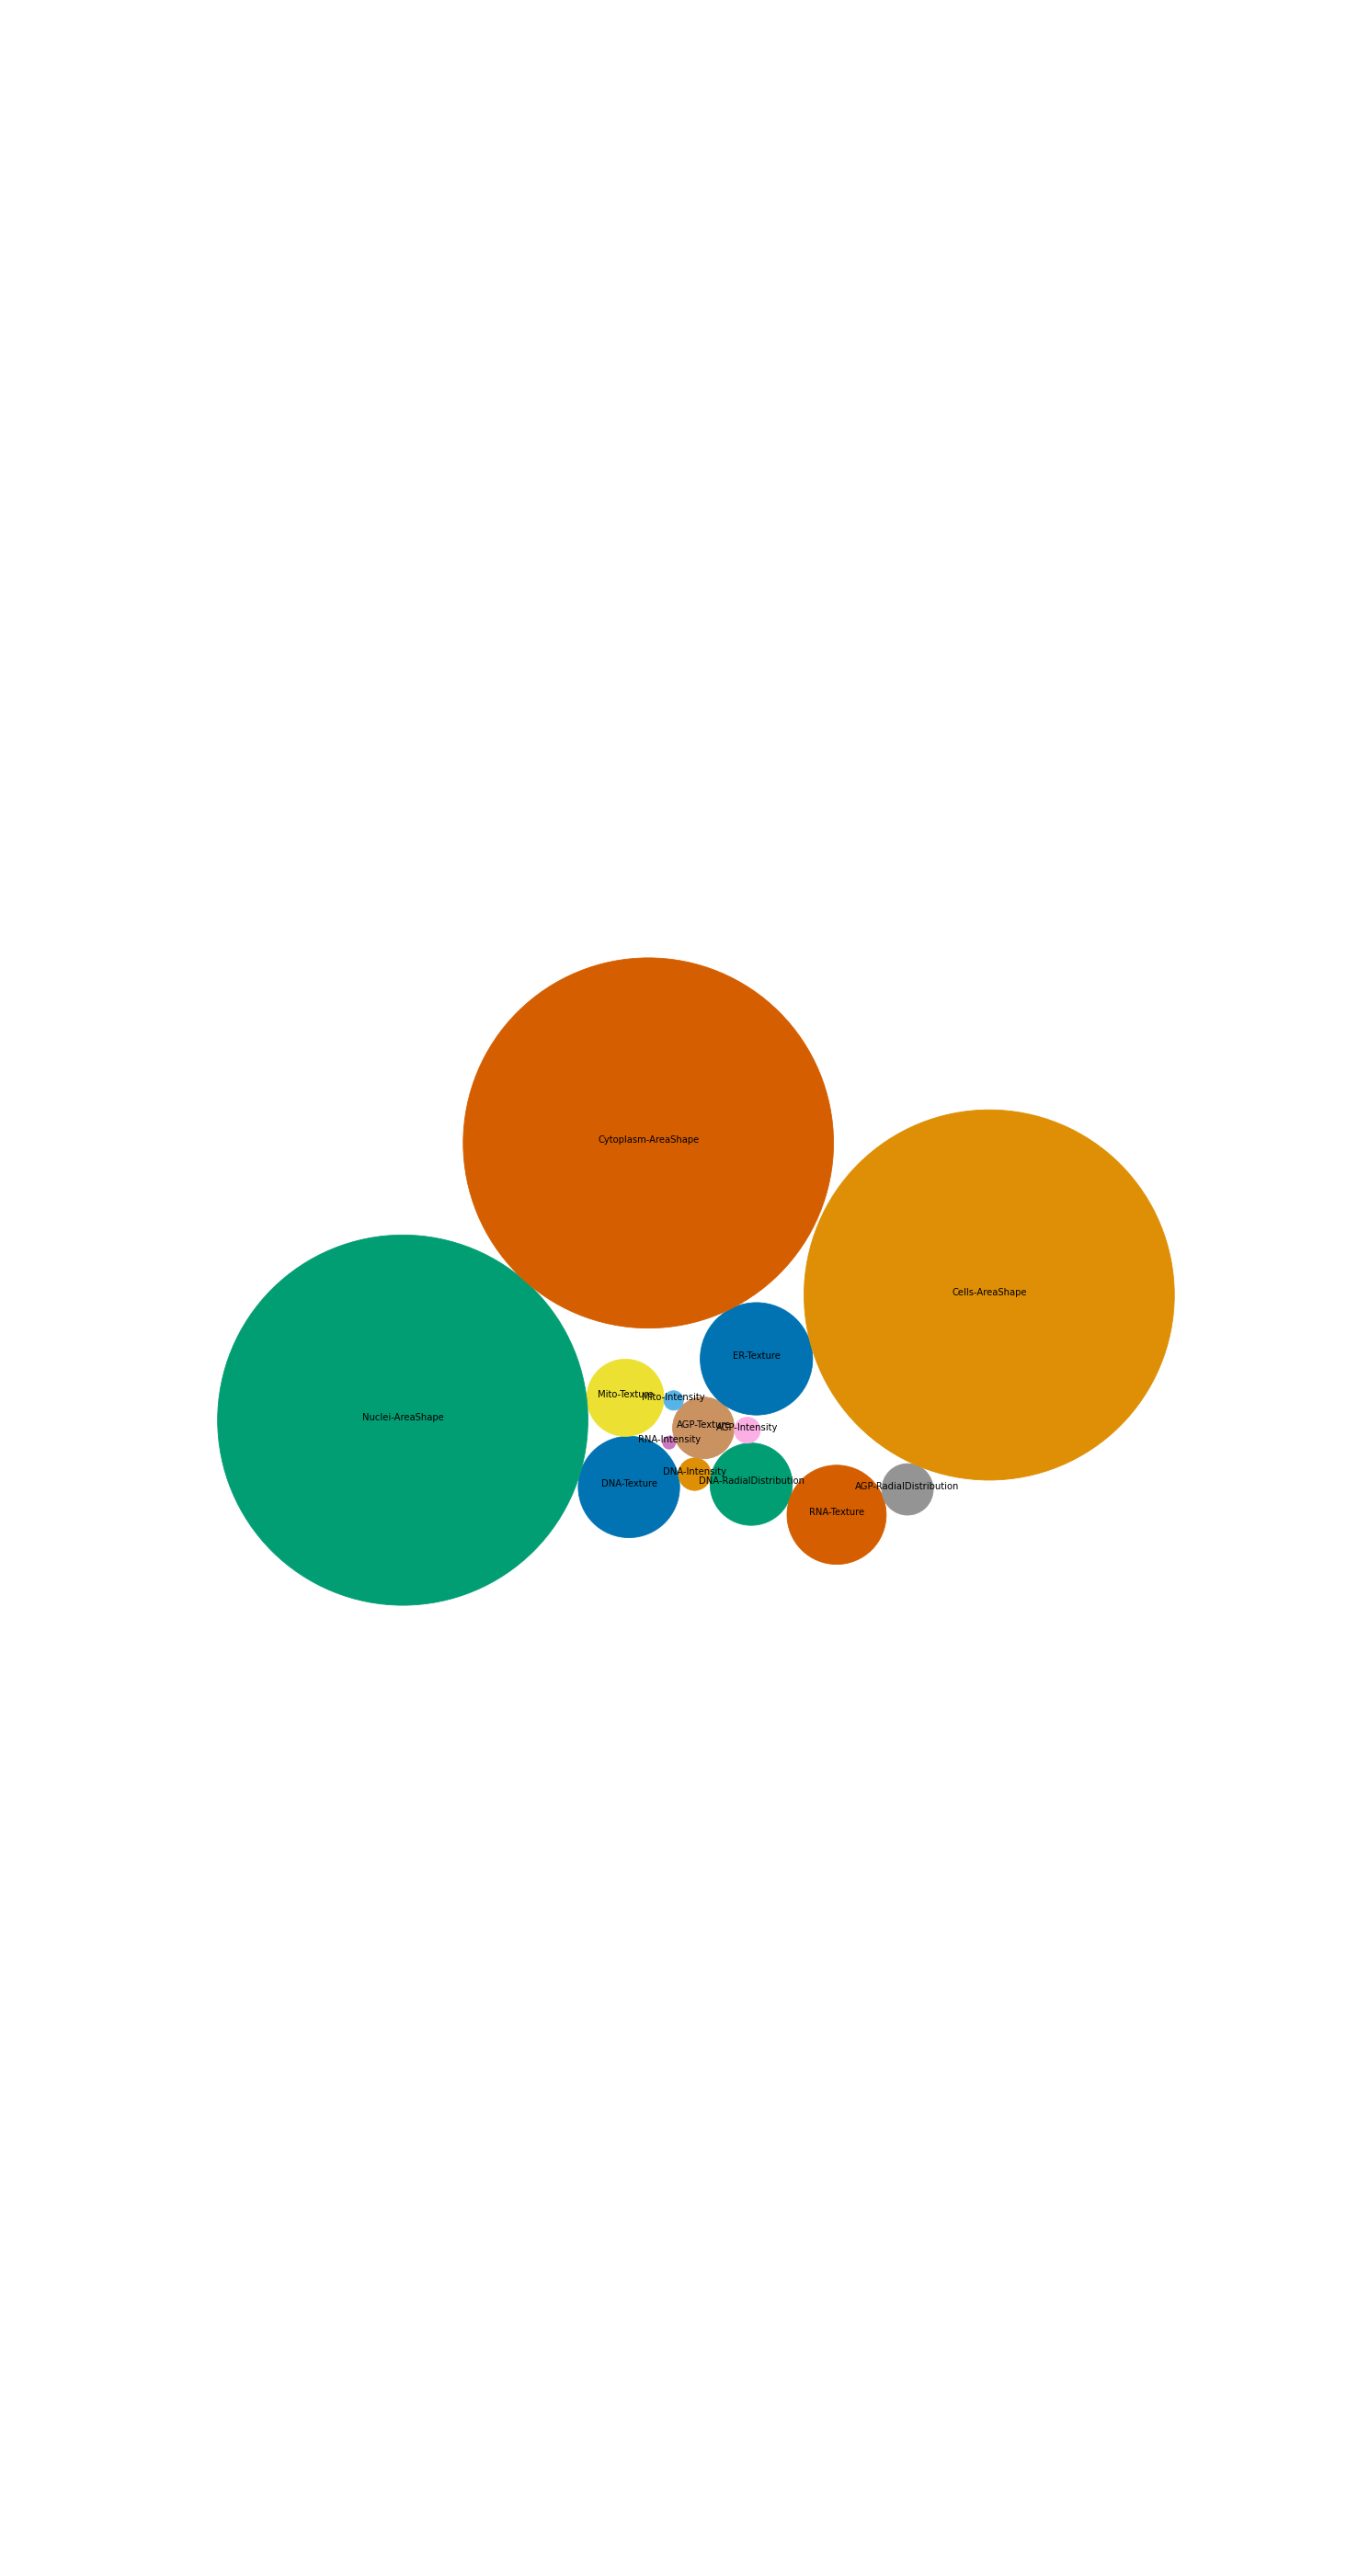

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# create 10 circles with different radii
# r = np.random.randint(5,15, size=10)
# r =np.array([1,  5,  6, 1])
# label=['A','B','C','D']
# colors=['r','b','g','c']


label=['DNA','RNA','AGP','Mito','ER','Texture','Intensity','RadialDistribution',"AreaShape"]
r=[]
for l in label:
    r.append(len([s for s in topFeatures if (l in s)]))
    
    

r_t=[]
for l in label:
    r_t.append(len([s for s in cp_featuress if (l in s)]))    
    
ratio_list=[(r[i]/r_t[i])*100 for i in range(len(r))]    

colors=sns.color_palette("hls", len(label))

class C():
    def __init__(self,r,label,colors):
        self.N = len(r)
        self.x = np.ones((self.N,3))
        self.x[:,2] = r
        self.labels = label
        self.colors = colors
        maxstep = 2*self.x[:,2].max()
        length = np.ceil(np.sqrt(self.N))
        grid = np.arange(0,length*maxstep,maxstep)
        gx,gy = np.meshgrid(grid,grid)
        self.x[:,0] = gx.flatten()[:self.N]
        self.x[:,1] = gy.flatten()[:self.N]
        self.x[:,:2] = self.x[:,:2] - np.mean(self.x[:,:2], axis=0)

        self.step = self.x[:,2].min()
        self.p = lambda x,y: np.sum((x**2+y**2)**2)
        self.E = self.energy()
        self.iter = 1.

    def minimize(self):
        while self.iter < 1000*self.N:
            for i in range(self.N):
                rand = np.random.randn(2)*self.step/self.iter
                self.x[i,:2] += rand
                e = self.energy()
                if (e < self.E and self.isvalid(i)):
                    self.E = e
                    self.iter = 1.
                else:
                    self.x[i,:2] -= rand
                    self.iter += 1.

    def energy(self):
        return self.p(self.x[:,0], self.x[:,1])

    def distance(self,x1,x2):
        return np.sqrt((x1[0]-x2[0])**2+(x1[1]-x2[1])**2)-x1[2]-x2[2]

    def isvalid(self, i):
        for j in range(self.N):
            if i!=j: 
                if self.distance(self.x[i,:], self.x[j,:]) < 0:
                    return False
        return True

    def plot(self, ax):
        for i in range(self.N):
            circ = plt.Circle(self.x[i,:2],self.x[i,2],color=self.colors[i])
            
#             ax.text(self.x[i,:2],self.x[i,2], 'sgfd', size=24, ha='center', va='center',color='k')
            ax.add_patch(circ)
            label = ax.annotate(self.labels[i], xy=(self.x[i,:2]), fontsize=10, ha="center",color='k')
            

# c = C(r,label,colors)

# c = C(r2,label2,colors2)
c = C(ratio_list2,label2,colors2)

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
ax.axis("off")

c.minimize()

c.plot(ax)
ax.relim()
ax.autoscale_view()
plt.show()

In [ ]:
print(result_triplets3[['Metadata_Sample_uniqe','cc_p','cc_np','cc_wt_mt_p']].drop_duplicates().reset_index(drop=True).to_markdown())

## Feature categorical median prediction score 

In [63]:
filename=results_dir+'/SingleGenePred_cpCategoryMap/cat_scores_maps.xlsx'
saved_scores=pd.read_excel(filename, sheet_name=None)
saved_scores.keys()

dict_keys(['LUAD-9-lasso-ht', 'LINCS-25-lasso-ht', 'LINCS-25-MLP-ht'])

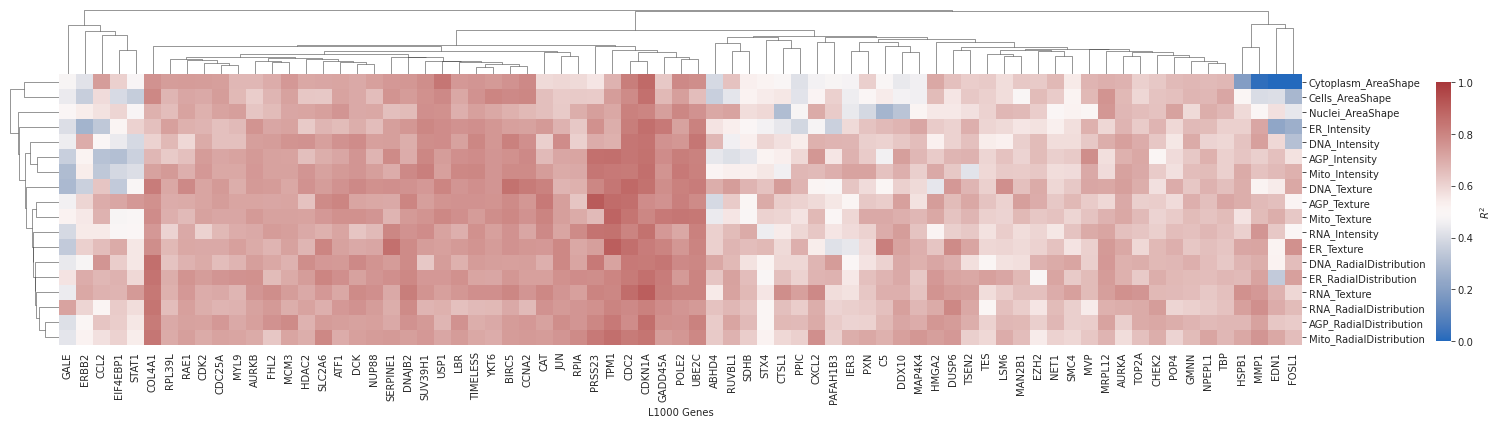

In [21]:
%matplotlib inline
which_ds_model='LUAD-9-lasso-ht'
dfcats=saved_scores[which_ds_model].rename(columns={'Unnamed: 0':'L1000 Genes'}).set_index('L1000 Genes')
dfcats=dfcats[dfcats.columns[~dfcats.isna().any()].tolist()]
topGenes_df2=dfcats[dfcats.max(axis=1)>0.7]

clustergrid=sns.clustermap(topGenes_df2.T,xticklabels=1,yticklabels=1,figsize=(20, 6),cmap="vlag",\
vmin=0, vmax=1,cbar_kws={'label': '$R^2$'},cbar_pos=(1, .2, .01, .6),dendrogram_ratio=(0.04,0.2))

# clustergrid.fig.suptitle('LUAD');
clustergrid.savefig(results_dir+'/SingleGenePred_cpCategoryMap/CatMap-'+which_ds_model+'.png', format='png',dpi=100)

In [7]:
# topGenes_df2.shape

(73, 18)

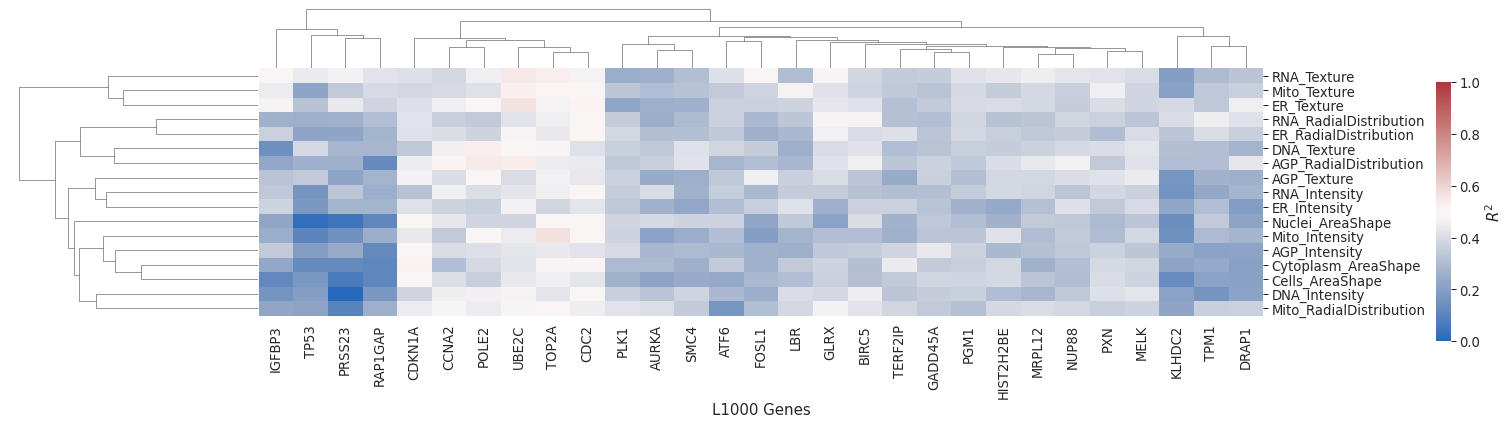

In [85]:
%matplotlib inline
which_ds_model='LINCS-25-lasso-ht'
dfcats=saved_scores[which_ds_model].rename(columns={'Unnamed: 0':'L1000 Genes'}).set_index('L1000 Genes')
dfcats=dfcats[dfcats.columns[~dfcats.isna().any()].tolist()]
topGenes_df2=dfcats[dfcats.max(axis=1)>0.4]

clustergrid=sns.clustermap(topGenes_df2.T,xticklabels=1,yticklabels=1,figsize=(20, 6),cmap="vlag",\
                           vmin=0, vmax=1,cbar_kws={'label': '$R^2$'},cbar_pos=(1, .2, .01, .6))
# clustergrid.fig.suptitle('LUAD');
clustergrid.savefig(results_dir+'/SingleGenePred_cpCategoryMap/CatMap-'+which_ds_model+'.png', format='png',dpi=100)

In [84]:
dfcats

,DNA_Texture,DNA_Intensity,RNA_Texture,RNA_Intensity,RNA_RadialDistribution,AGP_Texture,AGP_Intensity,AGP_RadialDistribution,Mito_Texture,Mito_Intensity,Mito_RadialDistribution,ER_Texture,ER_Intensity,ER_RadialDistribution,Nuclei_AreaShape,Cytoplasm_AreaShape,Cells_AreaShape
L1000 Genes,,,,,,,,,,,,,,,,,
PSME1,0.198644,0.114170,0.263495,0.103871,0.091311,0.173546,0.013167,0.218375,0.157273,0.107764,0.130951,0.268080,0.018866,0.084901,0.074853,0.004780,0.058287
ATF1,-0.041889,-0.015528,-0.018930,-0.050327,-0.037024,-0.021075,-0.017903,-0.018240,-0.024953,-0.020574,-0.044069,-0.003375,-0.011892,-0.076104,-0.018911,-0.105728,-0.019628
RHEB,0.007836,-0.000927,-0.050240,-0.076271,-0.093574,-0.060072,-0.085477,-0.021397,0.002194,-0.041626,0.026241,-0.072862,-0.018045,-0.031927,-0.035166,-0.048785,-0.040388
FOXO3,0.034839,0.008234,0.132048,0.102796,0.002918,0.104290,0.043792,-0.014698,-0.034965,-0.047492,-0.017042,0.131368,0.130041,0.066229,0.113105,0.128763,0.022583
RHOA,0.052866,-0.001764,0.090261,-0.003245,0.041445,0.042332,0.039936,0.018079,-0.011993,-0.014796,-0.001911,0.027529,-0.000881,0.060517,0.026867,-0.009882,0.001283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATP11B,0.050580,0.025909,0.044148,0.077803,0.063940,0.056028,0.038916,0.046106,0.042578,0.044740,0.035354,0.041566,0.038908,0.068602,0.021458,0.034322,0.004981
CD320,0.130195,0.050176,0.079361,0.058391,0.071766,0.090185,0.049968,0.070713,0.109930,0.056504,0.066496,0.073655,0.055733,0.100834,0.049456,0.070379,0.073514
MLLT11,-0.056618,-0.047253,-0.021668,-0.077626,-0.056272,-0.047253,-0.047253,-0.054070,0.003178,-0.050546,-0.082247,-0.056618,-0.032774,-0.092375,-0.016948,-0.133620,-0.100847


## Modality Integration

In [66]:
filename=results_dir+'/MoAprediction/pred_moa.xlsx'
saved_scores=pd.read_excel(filename, sheet_name=None)
saved_scores.keys()

dict_keys(['fuseConcat-LINCS-nvs-filt', 'fuseCCA-LINCS-nvs-filt', 'fuseSNF-LINCS-nvs-filt', 'fuseConcat-LINCS-nvs-', 'fuseCCA-LINCS-nvs-', 'fuseSNF-LINCS-nvs-', 'fuseConcat-LINCS-nvs-filt-f1', 'fuseConcat-LINCS-nvs-filt-predictions', 'fuseConcat-LINCS-nvs-filt-predictions-RF', 'fuseCCA-LINCS-nvs-filtpredictions', 'fuseCCA-LINCS-nvs-filt-predictions', 'fuseConcat-LINCS-nvs--predictions-RF', 'fuseConcat-LINCS-nvs--preds-lr', 'fC-LINCS-nvs-filt-preds-lr-ht', 'fCCA-LINCS-nvs-filt-preds-lr-ht', 'fCCA-LINCS-nvs-filt-preds-mlp-ht', 'fC-LINCS-nvs-filt-preds-mlp-ht', 'mofa-5facLINCS-nvs-filt-preds-mlp-ht', 'mofa-5facLINCS-nvs-filt-preds-lr-ht', 'mofa-600facLINCS-nvs-filt-preds-lr-ht', 'mofa-10facLINCS-nvs-filt-preds-lr-ht', 'mofa-100facLINCS-nvs-filt-preds-lr-ht', 'mofa-100facLINCS-nvs-filt-preds-mlp-ht'])

In [67]:
from sklearn.metrics import f1_score
res_df=pd.DataFrame(columns=['Modality','Model'])
DS='LINCS'
scores_mlp=saved_scores['fC-'+DS+'-nvs-filt-preds-lr-ht']
mofa_scores_2add=saved_scores['mofa-100fac'+DS+'-nvs-filt-preds-lr-ht']

In [45]:
mofa_scores_2add

,Unnamed: 0,CP,GE,Early Fusion,Late Fusion,Metadata_moa_num,mofa
0,BRD-A01636364,NaN,NaN,NaN,NaN,51,23
1,BRD-A01787639,NaN,NaN,NaN,NaN,21,23
2,BRD-A01787639,NaN,NaN,NaN,NaN,21,23
3,BRD-A01787639,NaN,NaN,NaN,NaN,21,45
4,BRD-A01787639,NaN,NaN,NaN,NaN,21,45
...,...,...,...,...,...,...,...
1650,BRD-K99792991,NaN,NaN,NaN,NaN,42,45
1651,BRD-M80207679,NaN,NaN,NaN,NaN,32,23
1652,BRD-M80207679,NaN,NaN,NaN,NaN,32,45
1653,BRD-M80207679,NaN,NaN,NaN,NaN,32,45


In [68]:
# scores_mlp=saved_scores['fC-'+DS+'-nvs-filt-preds-lr-ht']
# mofa_scores_2add=saved_scores['mofa-600fac'+DS+'-nvs-filt-preds-lr-ht']
scores_mlp['mofa']=mofa_scores_2add['mofa']
scores_mlp

scores_mlp['mofa'].unique()

array([23, 45, 34, 16])

In [69]:
from sklearn.metrics import f1_score
res_df=pd.DataFrame(columns=['Modality','Model'])
DS='LINCS'
scores_mlp=saved_scores['fC-'+DS+'-nvs-filt-preds-mlp-ht']
mofa_scores_2add=saved_scores['mofa-100fac'+DS+'-nvs-filt-preds-mlp-ht']
scores_mlp['mofa']=mofa_scores_2add['mofa']


for dd in ['CP', 'GE', 'Early Fusion', 'Late Fusion','mofa']:
    scor_vals=scores_mlp[dd].apply(lambda x: int(eval(x)[0]) if type(x)==str else x)    
    f1=f1_score(scor_vals,scores_mlp.Metadata_moa_num.values, average='weighted')
    temp_df = pd.DataFrame(data={'Modality': [dd], 'Model': ['MLP'],'F1-score':[f1*100]})
    res_df=res_df.append(temp_df)
    
    
scores_mlp=saved_scores['fC-'+DS+'-nvs-filt-preds-lr-ht']
mofa_scores_2add=saved_scores['mofa-100fac'+DS+'-nvs-filt-preds-lr-ht']
scores_mlp['mofa']=mofa_scores_2add['mofa']

for dd in ['CP', 'GE', 'Early Fusion', 'Late Fusion','mofa']:
    scor_vals=scores_mlp[dd].apply(lambda x: int(eval(x)[0]) if type(x)==str else x)    
    f1=f1_score(scores_mlp.Metadata_moa_num.values,scor_vals, average='weighted')
    temp_df = pd.DataFrame(data={'Modality': [dd], 'Model': ['Logistic R'],'F1-score':[f1*100]})
    res_df=res_df.append(temp_df)
    
scores_mlp=saved_scores['fCCA-'+DS+'-nvs-filt-preds-lr-ht']
for dd in ['Late Fusion']:
    scor_vals=scores_mlp[dd].apply(lambda x: int(eval(x)[0]) if type(x)==str else x)    
    f1=f1_score(scores_mlp.Metadata_moa_num.values,scor_vals, average='weighted')
    temp_df = pd.DataFrame(data={'Modality': [dd+' - CCA'], 'Model': ['Logistic R'],'F1-score':[f1*100]})
    res_df=res_df.append(temp_df)  
    
    
scores_mlp=saved_scores['fCCA-'+DS+'-nvs-filt-preds-mlp-ht']
for dd in ['Late Fusion']:
    scor_vals=scores_mlp[dd].apply(lambda x: int(eval(x)[0]) if type(x)==str else x)    
    f1=f1_score(scores_mlp.Metadata_moa_num.values,scor_vals, average='weighted')
    temp_df = pd.DataFrame(data={'Modality': [dd+' - CCA'], 'Model': ['MLP'],'F1-score':[f1*100]})
    res_df=res_df.append(temp_df)  

In [70]:
res_df

,Modality,Model,F1-score
0,CP,MLP,24.308301
0,GE,MLP,23.847853
0,Early Fusion,MLP,24.620089
0,Late Fusion,MLP,26.484088
0,mofa,MLP,1.473656
0,CP,Logistic R,24.301731
0,GE,Logistic R,24.736531
0,Early Fusion,Logistic R,26.595198
0,Late Fusion,Logistic R,28.275360
0,mofa,Logistic R,0.165915


In [37]:
res_df

,Modality,Model,F1-score
0,CP,MLP,24.308301
0,GE,MLP,23.847853
0,Early Fusion,MLP,24.620089
0,Late Fusion,MLP,26.484088
0,mofa,MLP,5.151306
0,CP,Logistic R,24.301731
0,GE,Logistic R,24.736531
0,Early Fusion,Logistic R,26.595198
0,Late Fusion,Logistic R,28.275360
0,mofa,Logistic R,0.160641


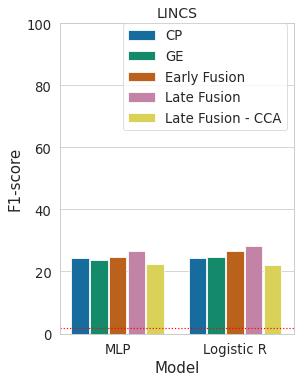

In [38]:
import matplotlib.style as style
style.use('seaborn-colorblind')
sns.set_context("paper",font_scale = 1.5, rc={"font.size":4,"axes.titlesize":14,"axes.labelsize":15})
res_df1=res_df[res_df['Modality']!='Early Fusion']
res_df2=res_df[res_df['Modality']!='Late Fusion']

sns.set_style("whitegrid")
plt.figure(figsize=(4,5))
ax = sns.barplot(x="Model", y="F1-score", hue="Modality", data=res_df)#,**kwargs)
# ax = sns.barplot(x="Model", y="F1-score", hue="Modality", data=res_df2)
# ax.legend(ncol = 1, loc = 'upper center')
# plt.legend(loc='top', borderaxespad=0)
plt.legend(bbox_to_anchor=(0.27, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
ax.set_ylim(0,100)
ax.set_title(DS)
n_classes=57;
ax.axhline(y=(100/n_classes),linestyle=':',color='r');

for a in ax.patches:
    a.set_width(0.15)
# plt.savefig('moa_class_bar.eps')

In [77]:
from sklearn.metrics import classification_report
scores_mlp=saved_scores['fC-LINCS-nvs-filt-preds-lr-ht']
scor_vals=scores_mlp['Late Fusion'].apply(lambda x: int(eval(x)[0]) if type(x)==str else x)    
scor_vals_cp=scores_mlp['CP'].apply(lambda x: int(eval(x)[0]) if type(x)==str else x)    
scor_vals_ge=scores_mlp['GE'].apply(lambda x: int(eval(x)[0]) if type(x)==str else x)    

report_clss=pd.DataFrame(classification_report(scores_mlp.Metadata_moa_num.values,scor_vals.values,output_dict=True)).transpose()
report_clss_cp=pd.DataFrame(classification_report(scores_mlp.Metadata_moa_num.values,scor_vals_cp.values,output_dict=True)).transpose()
report_clss_ge=pd.DataFrame(classification_report(scores_mlp.Metadata_moa_num.values,scor_vals_ge.values,output_dict=True)).transpose()

# report_clss[list(range(13))]
# n_classes=14
n_classes=57
report_clss['MoA']=''
# report_clss
report_clss.loc[0:n_classes,'MoA']=le.inverse_transform(list(range(n_classes)))
report_clss2=report_clss[0:n_classes]

report_clss3=report_clss2.sort_values(by='f1-score',ascending=False)
report_clss3['f1-score-cp']=report_clss_cp.loc[report_clss3.index]['f1-score'].values
report_clss3['f1-score-ge']=report_clss_ge.loc[report_clss3.index]['f1-score'].values
report_clss4=report_clss3[['f1-score-cp','f1-score-ge','f1-score']]
report_clss4=report_clss4.rename(columns={'f1-score-cp':'CP','f1-score-ge':'GE','f1-score':'Late Fusion of CP and GE'})
report_clss4.index=report_clss3['MoA']
ax = report_clss4.plot.bar(rot=90,figsize=(12,6))
plt.title('MoA class specific F1-scores')
plt.tight_layout()
# plt.savefig('moa_class_spacific_bar.eps')

/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'le' is not defined

In [78]:
plt.figure(figsize=(5,5))
import matplotlib.style as style
style.use('seaborn-colorblind')
sns.scatterplot(data=report_clss2, x="n_samples", y="f1-score", hue="MoA",legend=False)
plt.tight_layout()# p


NameError: name 'report_clss2' is not defined

<Figure size 360x360 with 0 Axes>

In [80]:
scores_mlp

,Unnamed: 0,CP,GE,Early Fusion,Late Fusion,Metadata_moa_num
0,BRD-A01636364,[5],[27],[5],[5],51
1,BRD-A01787639,48,32,35,48,21
2,BRD-A01787639,41,24,24,41,21
3,BRD-A01787639,25,21,21,21,21
4,BRD-A01787639,5,5,5,5,21
...,...,...,...,...,...,...
1650,BRD-K99792991,54,55,1,55,42
1651,BRD-M80207679,50,27,35,50,32
1652,BRD-M80207679,50,19,50,50,32
1653,BRD-M80207679,50,5,35,50,32


## Appendix - Top 50 CP using MLP

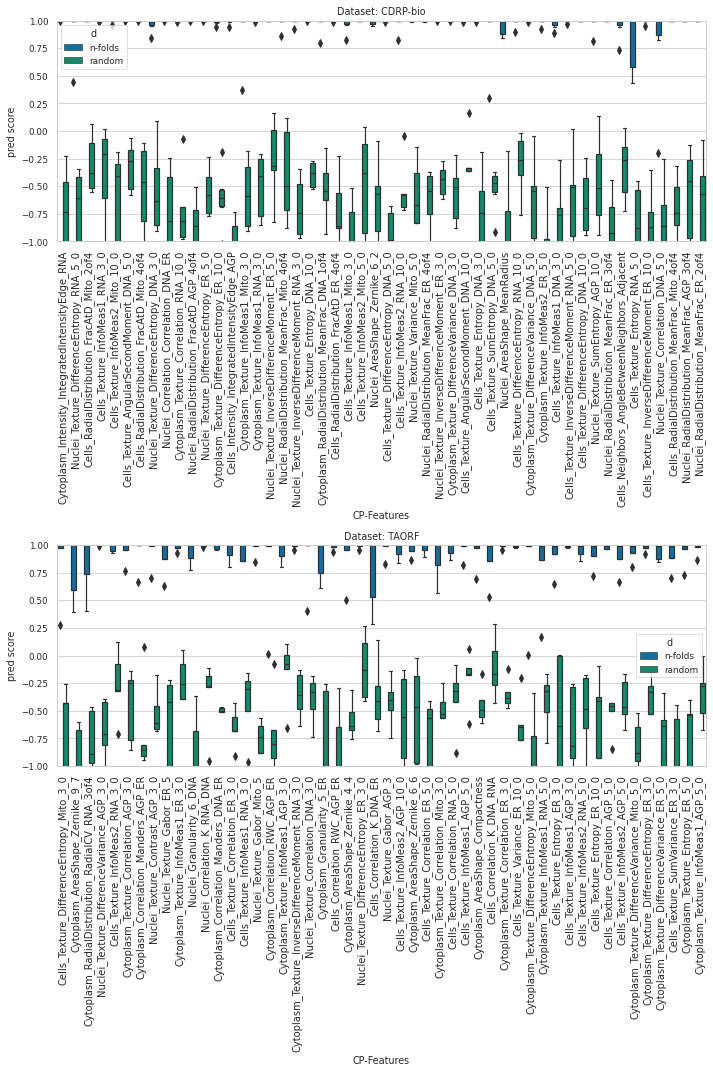

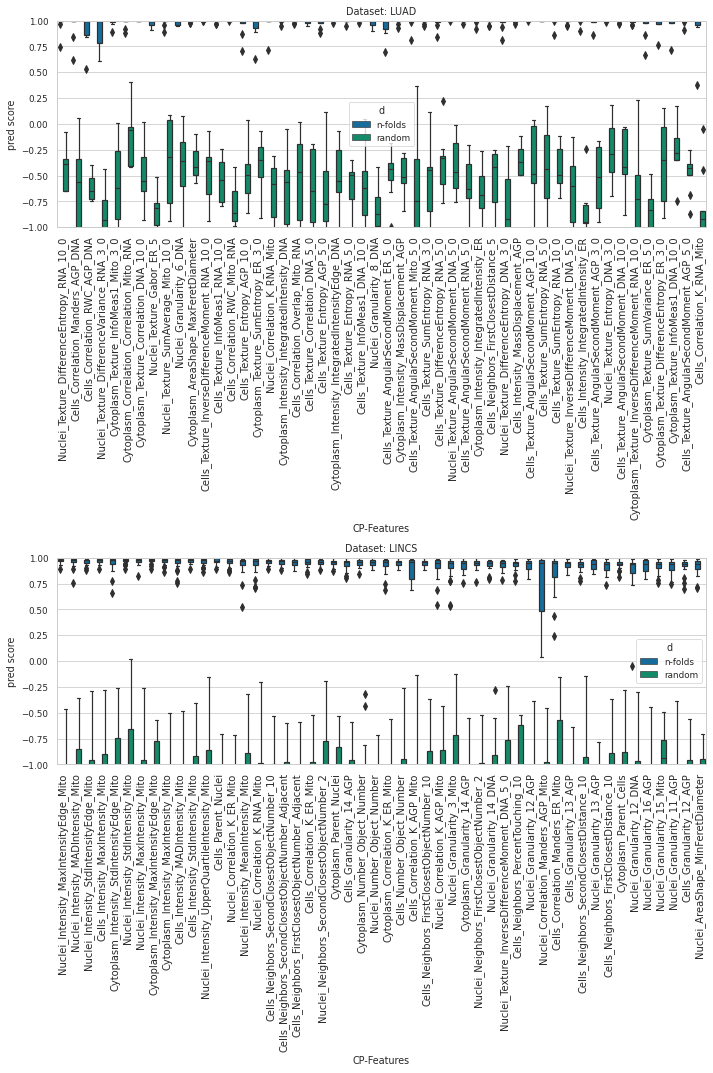

In [57]:
datasets=['CDRP-bio' , 'TAORF']
models=["MLP"]
f='-filt';#'-filt'
DataPredResults_appC=DataPredResults.copy()
fig, axes = plt.subplots(len(datasets),1,figsize=(10,15))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
    for m in range(len(models)):
        dataset_meth_dists=DataPredResults_appC[(DataPredResults_appC['Dataset']==datasets[d]) &\
                                                    (DataPredResults_appC['Model']==models[m])]
#         kjhlhjl
#         CP-Features
        sorted_gene_mean_scores=dataset_meth_dists[dataset_meth_dists['d']=='n-folds'].groupby(['CP-Features','d']).median().reset_index().sort_values(by=['pred score'],ascending=False)
        top_lmGenes=sorted_gene_mean_scores['CP-Features'].tolist()[0:50]
        dataset_meth_dists_top_50=dataset_meth_dists[dataset_meth_dists['CP-Features'].isin(top_lmGenes)]
        
#         f, axes = plt.subplots(figsize=(15,4))
        axes[d].set_title("Dataset: "+datasets[d])
        sns.boxplot(x="CP-Features", y="pred score",hue="d", data=dataset_meth_dists_top_50,ax=axes[d],order=top_lmGenes)
        # ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
        axes[d].set_xticklabels(axes[d].get_xticklabels(),rotation=90,fontsize=10);
        axes[d].set_ylim(-1, 1)
        
fig.tight_layout()
# fig.savefig('appendix_C1.eps')

datasets=['LUAD','LINCS']
fig, axes = plt.subplots(len(datasets),1,figsize=(10,15))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
    for m in range(len(models)):
        dataset_meth_dists=DataPredResults_appC[(DataPredResults_appC['Dataset']==datasets[d]) &\
                                                    (DataPredResults_appC['Model']==models[m])]
#         kjhlhjl
#         CP-Features
        sorted_gene_mean_scores=dataset_meth_dists[dataset_meth_dists['d']=='n-folds'].groupby(['CP-Features','d']).median().reset_index().sort_values(by=['pred score'],ascending=False)
        top_lmGenes=sorted_gene_mean_scores['CP-Features'].tolist()[0:50]
        dataset_meth_dists_top_50=dataset_meth_dists[dataset_meth_dists['CP-Features'].isin(top_lmGenes)]
        
#         f, axes = plt.subplots(figsize=(15,4))
        axes[d].set_title("Dataset: "+datasets[d])
        sns.boxplot(x="CP-Features", y="pred score",hue="d", data=dataset_meth_dists_top_50,ax=axes[d],order=top_lmGenes)
        # ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
        axes[d].set_xticklabels(axes[d].get_xticklabels(),rotation=90,fontsize=10);
        axes[d].set_ylim(-1, 1)
        
fig.tight_layout()
# fig.savefig('appendix_C2.eps')